In [29]:
import nsetools as nt
from pprint import pprint

from nsetools import Nse

nse=Nse()

# q= nse.get_quote('infy')

# nse.get_index_list()
# nse.get_index_quote('NIFTY BANK')

# all_stock_codes=nse.get_stock_codes()

# adv_dec = nse.get_advances_declines()

# top_gainers = nse.get_top_gainers()

fno = nse.get_fno_lot_sizes()


In [292]:
import nsetools as nt
from pprint import pprint
import pandas as pd
import numpy as np

from nsetools import Nse

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 20,9

from nsepy import get_history
from datetime import date
data = get_history(symbol="YESBANK", start=date(2015,10,6), end=date(2020,3,19))
# print(data)
# print(data.columns)

# data['Date']=pd.to_datetime(data['Date'],infer_datetime_format=True)

data.to_csv('equity.csv')

# data.reset_index().plot(x='Date', y='Close')

dataSet= pd.read_csv('equity.csv')
dataSet.reset_index(drop=True)

dataSet['Date']= pd.to_datetime(dataSet['Date'],infer_datetime_format=True)

indexedDataset=dataSet[["Date","Low"]]

indexedDataset.set_index('Date',inplace=True)

# indexedDataset

# indexedDataset.set_index('Date',inplace=True)

indexedDataset["Low"]


Date
2015-10-06    736.90
2015-10-07    733.60
2015-10-08    720.45
2015-10-09    720.10
2015-10-12    720.60
               ...  
2020-03-13     21.35
2020-03-16     26.05
2020-03-17     40.80
2020-03-18     49.90
2020-03-19     42.80
Name: Low, Length: 1101, dtype: float64

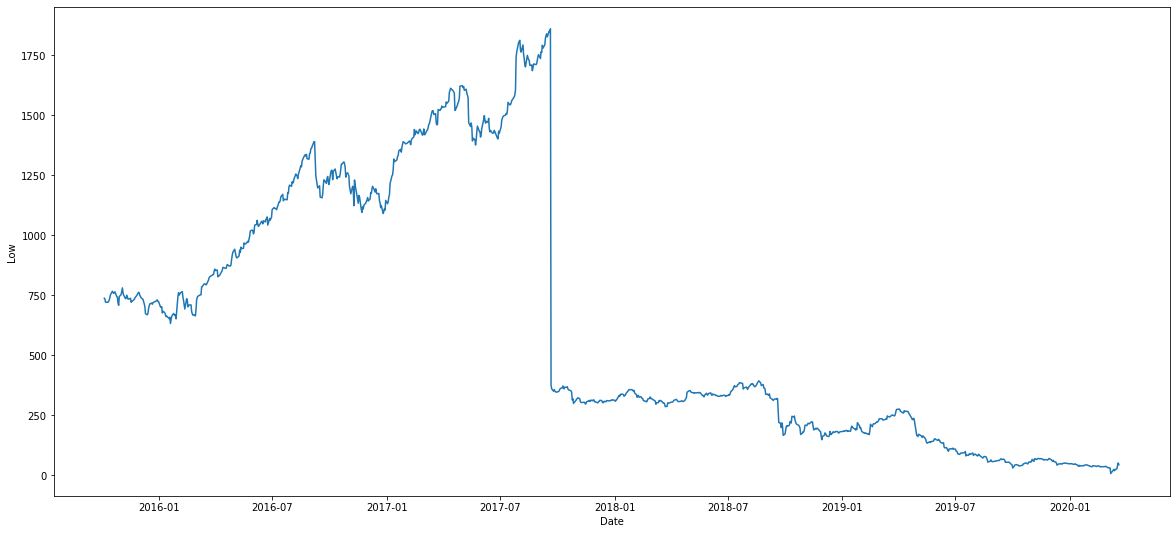

In [293]:
from datetime import datetime

plt.xlabel("Date")
plt.ylabel("Low")
plt.plot(indexedDataset)

In [294]:
rolmean=indexedDataset.rolling(window=1).mean()
rolstd=indexedDataset.rolling(window=1).std()

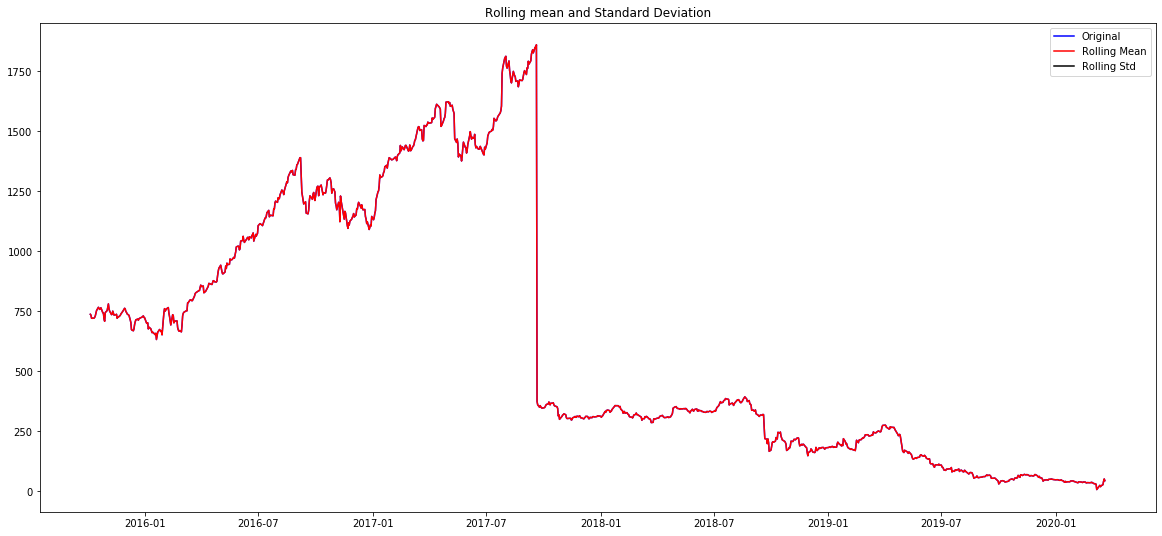

In [295]:
orig=plt.plot(indexedDataset,color='blue',label='Original')
mean=plt.plot(rolmean,color='red',label='Rolling Mean')
std= plt.plot(rolstd,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling mean and Standard Deviation')
plt.show(block=True)

In [296]:
# Perform Dickey-Fuller Test

from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test')
dftest=adfuller(indexedDataset['Low'],autolag='AIC')

dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Numbers of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Crtical Value (%s)'%key]=value

print(dfoutput)

Results of Dickey-Fuller Test
Test Statistic                    -1.264820
p-value                            0.645110
#Lags Used                         0.000000
Numbers of Observations Used    1100.000000
Crtical Value (1%)                -3.436309
Crtical Value (5%)                -2.864171
Crtical Value (10%)               -2.568171
dtype: float64


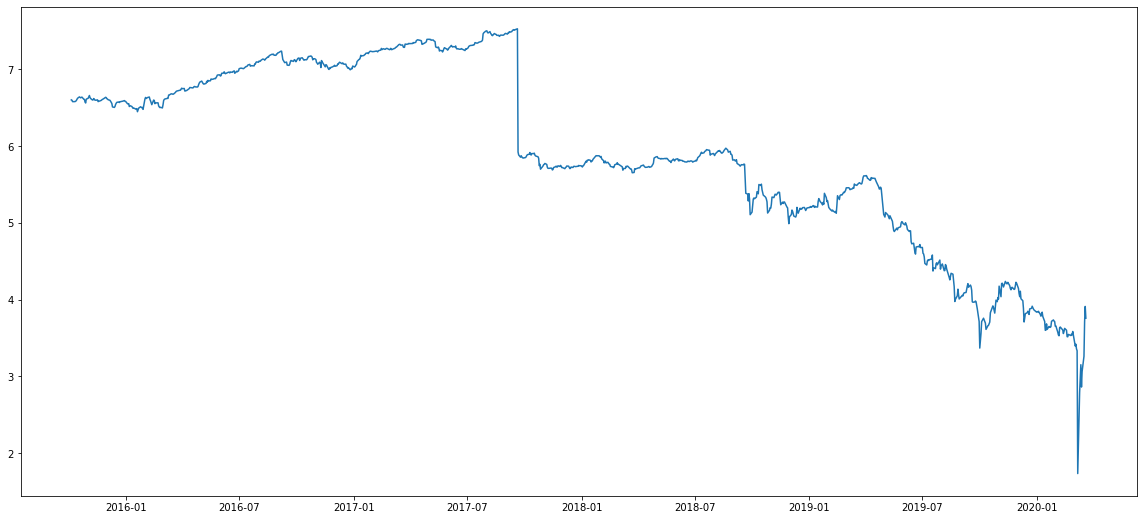

In [297]:
indexedDataset_logScale=np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

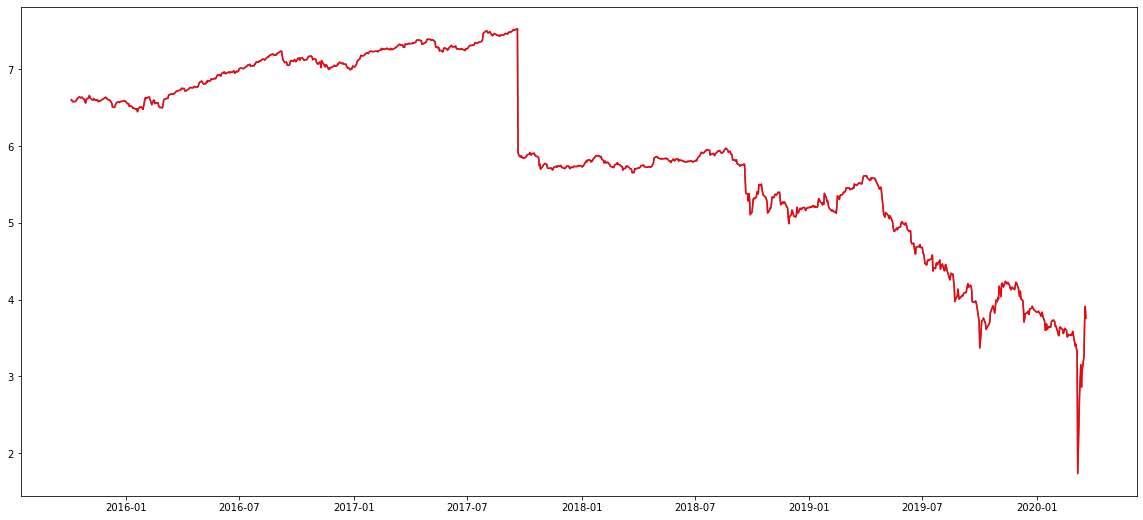

In [298]:
movingAverage= indexedDataset_logScale.rolling(window=1).mean()
movingSTD=indexedDataset_logScale.rolling(window=1).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage,color='red')

In [299]:
datasetLogScaleMinusMovingAverage=indexedDataset_logScale - movingAverage

# Remove NaN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(12)

,Low
Date,
2015-10-06,0.000000e+00
2015-10-07,0.000000e+00
2015-10-08,-8.881784e-16
2015-10-09,-8.881784e-16
2015-10-12,-1.776357e-15
2015-10-13,-2.664535e-15
2015-10-14,-2.664535e-15
2015-10-15,-1.776357e-15
2015-10-16,-2.664535e-15


In [300]:
from statsmodels.tsa.stattools import adfuller

def test_stationary(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=1).mean()
    movingSTD = timeseries.rolling(window=1).std()
    
    #plot rolling statistics
    orig= plt.plot(timeseries, color='blue', label='Original')
    mean= plt.plot(movingAverage, color='red', label="Rolling Mean")
    std=plt.plot( movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print("Result of Dickey-Fuller Test: ")
    dftest=adfuller(indexedDataset['Low'],autolag='AIC')

    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Numbers of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Crtical Value (%s)'%key]=value
    print(dfoutput)

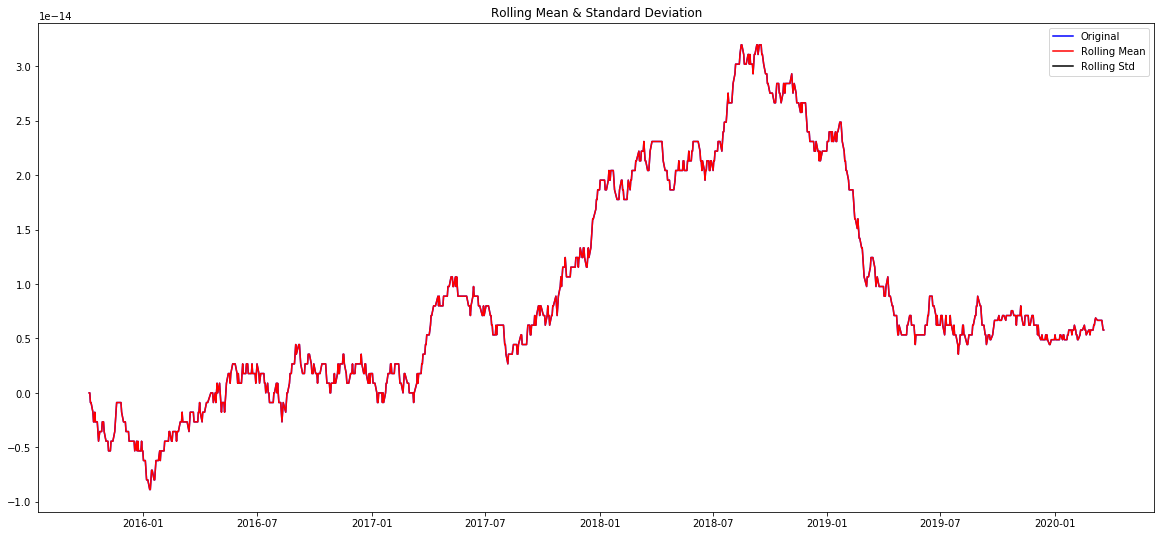

Result of Dickey-Fuller Test: 
Test Statistic                    -1.264820
p-value                            0.645110
#Lags Used                         0.000000
Numbers of Observations Used    1100.000000
Crtical Value (1%)                -3.436309
Crtical Value (5%)                -2.864171
Crtical Value (10%)               -2.568171
dtype: float64


In [301]:
test_stationary(datasetLogScaleMinusMovingAverage)

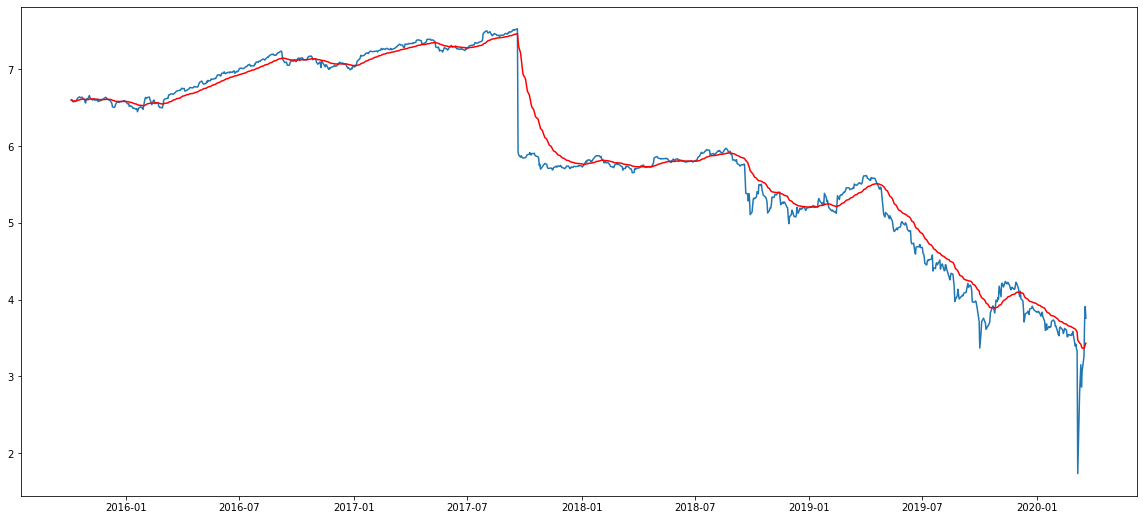

In [302]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

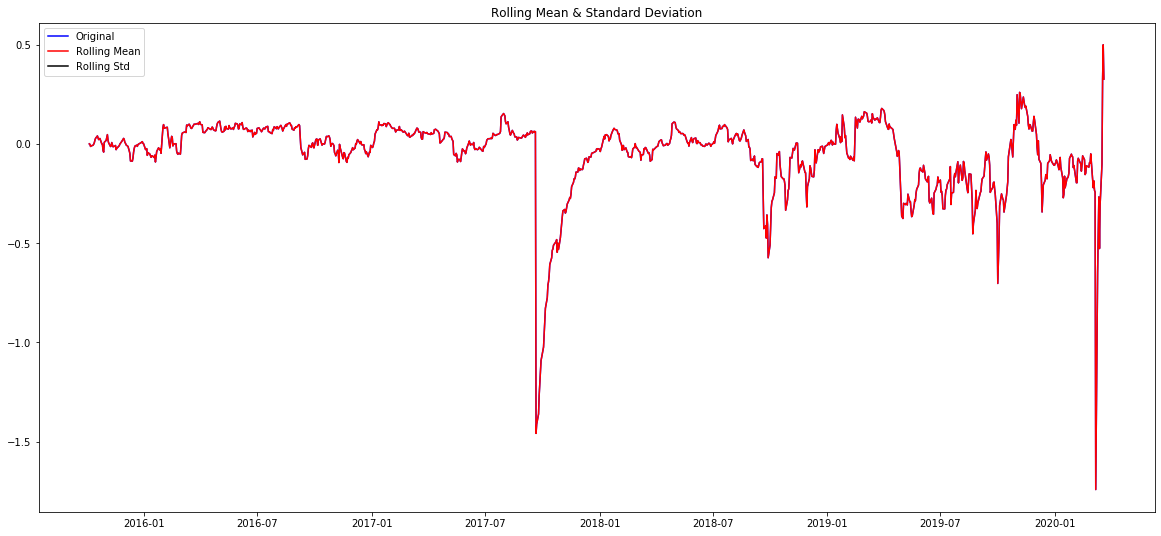

Result of Dickey-Fuller Test: 
Test Statistic                    -1.264820
p-value                            0.645110
#Lags Used                         0.000000
Numbers of Observations Used    1100.000000
Crtical Value (1%)                -3.436309
Crtical Value (5%)                -2.864171
Crtical Value (10%)               -2.568171
dtype: float64


In [303]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale -exponentialDecayWeightedAverage
test_stationary(datasetLogScaleMinusMovingExponentialDecayAverage)

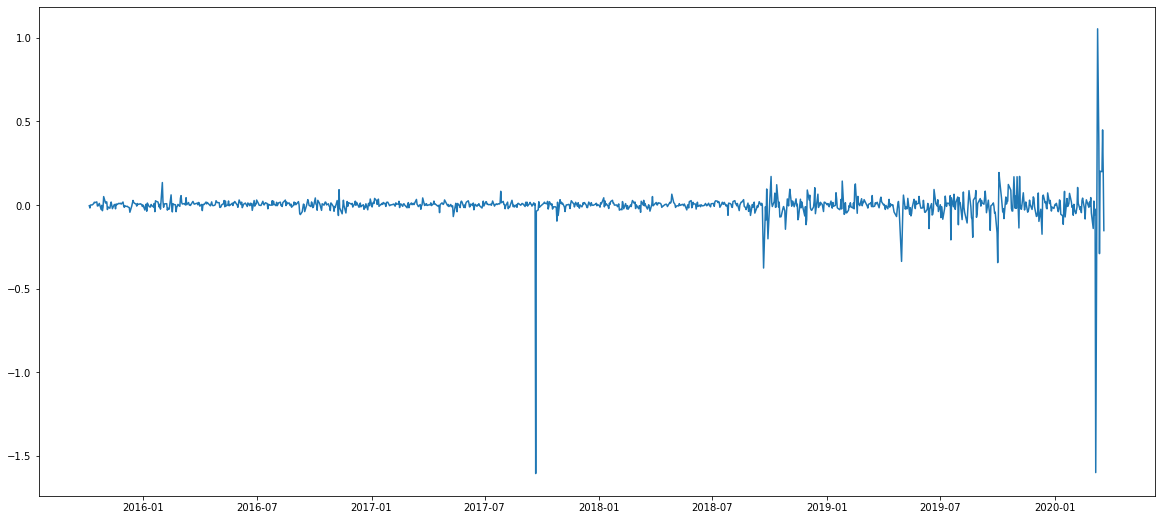

In [304]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

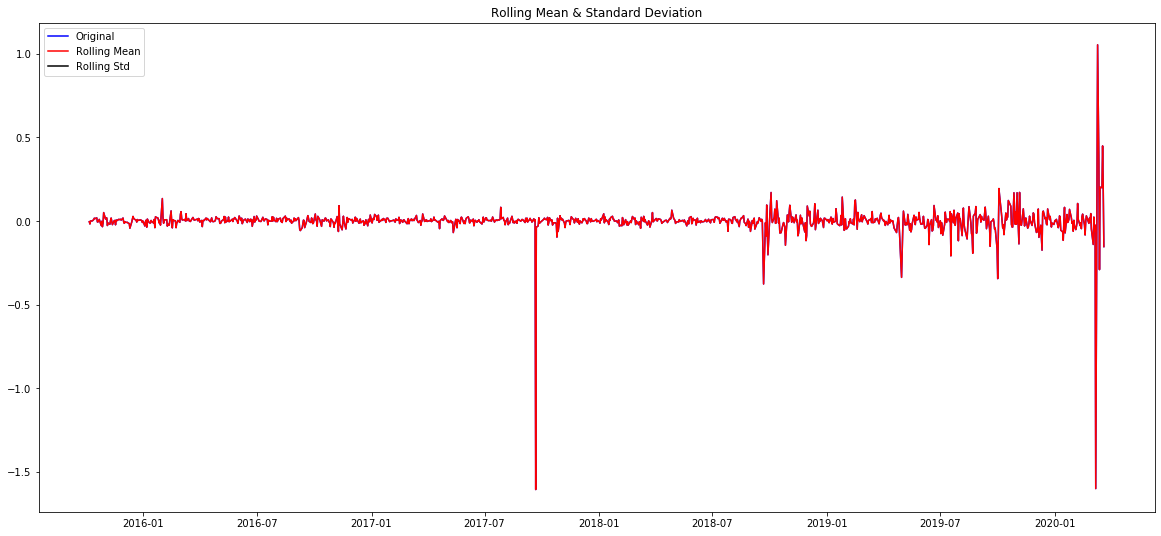

Result of Dickey-Fuller Test: 
Test Statistic                    -1.264820
p-value                            0.645110
#Lags Used                         0.000000
Numbers of Observations Used    1100.000000
Crtical Value (1%)                -3.436309
Crtical Value (5%)                -2.864171
Crtical Value (10%)               -2.568171
dtype: float64


In [305]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationary(datasetLogDiffShifting)

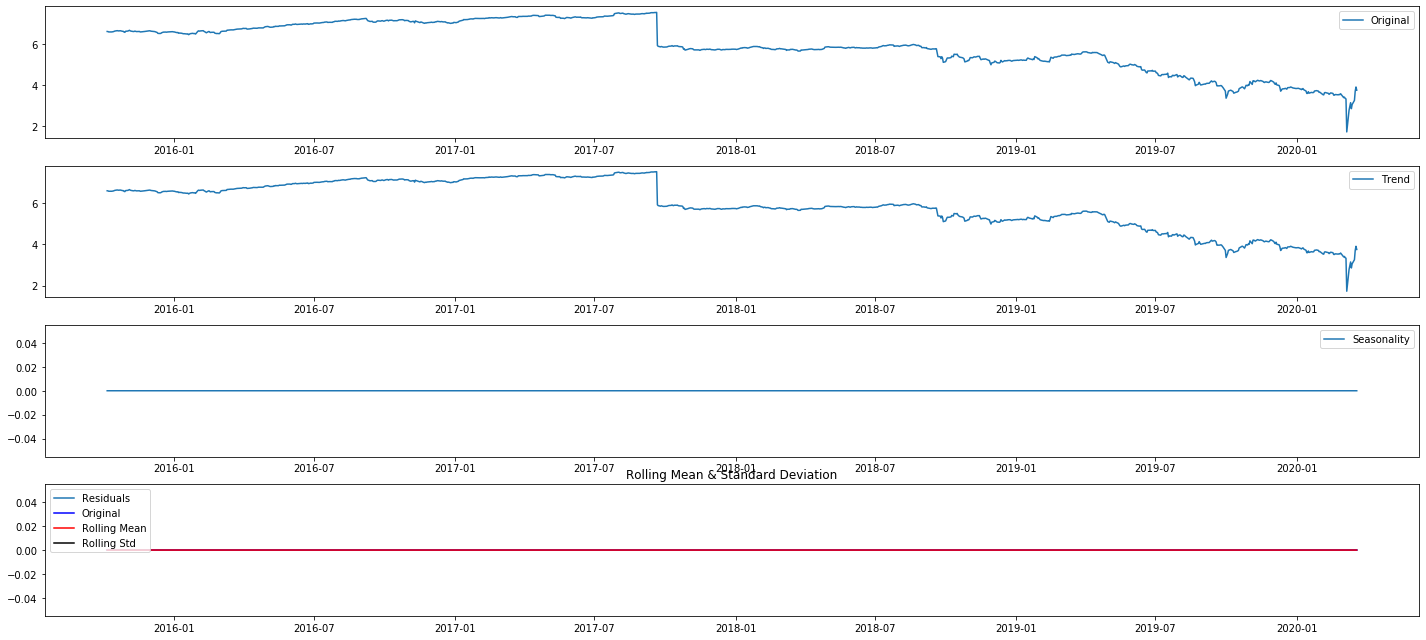

Result of Dickey-Fuller Test: 
Test Statistic                    -1.264820
p-value                            0.645110
#Lags Used                         0.000000
Numbers of Observations Used    1100.000000
Crtical Value (1%)                -3.436309
Crtical Value (5%)                -2.864171
Crtical Value (10%)               -2.568171
dtype: float64


In [306]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale,freq=1)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData= residual
decomposedLogData.dropna(inplace=True)
test_stationary(decomposedLogData)

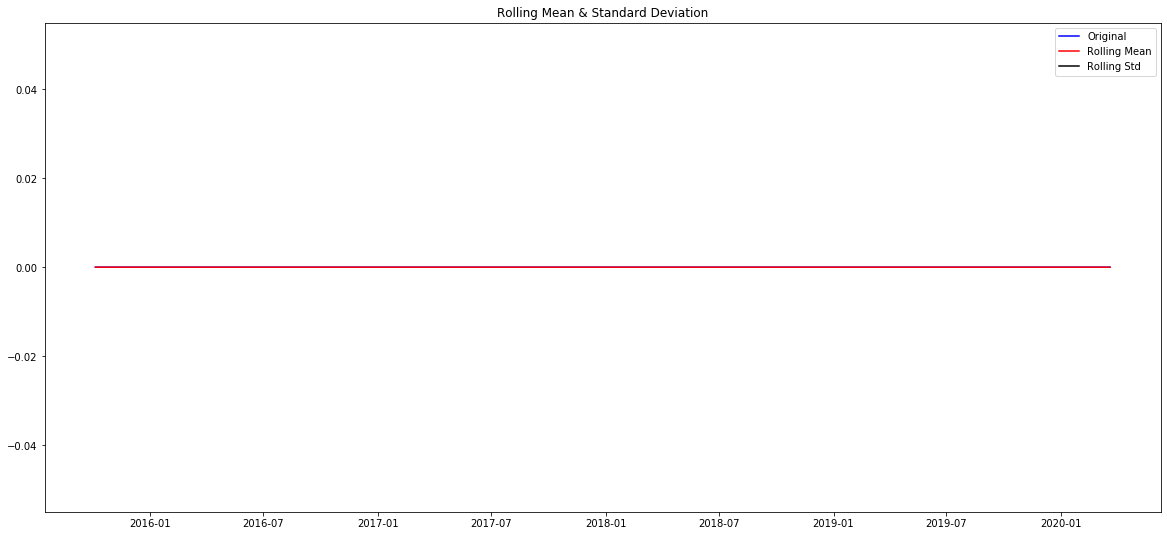

Result of Dickey-Fuller Test: 
Test Statistic                    -1.264820
p-value                            0.645110
#Lags Used                         0.000000
Numbers of Observations Used    1100.000000
Crtical Value (1%)                -3.436309
Crtical Value (5%)                -2.864171
Crtical Value (10%)               -2.568171
dtype: float64


In [307]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationary(decomposedLogData)

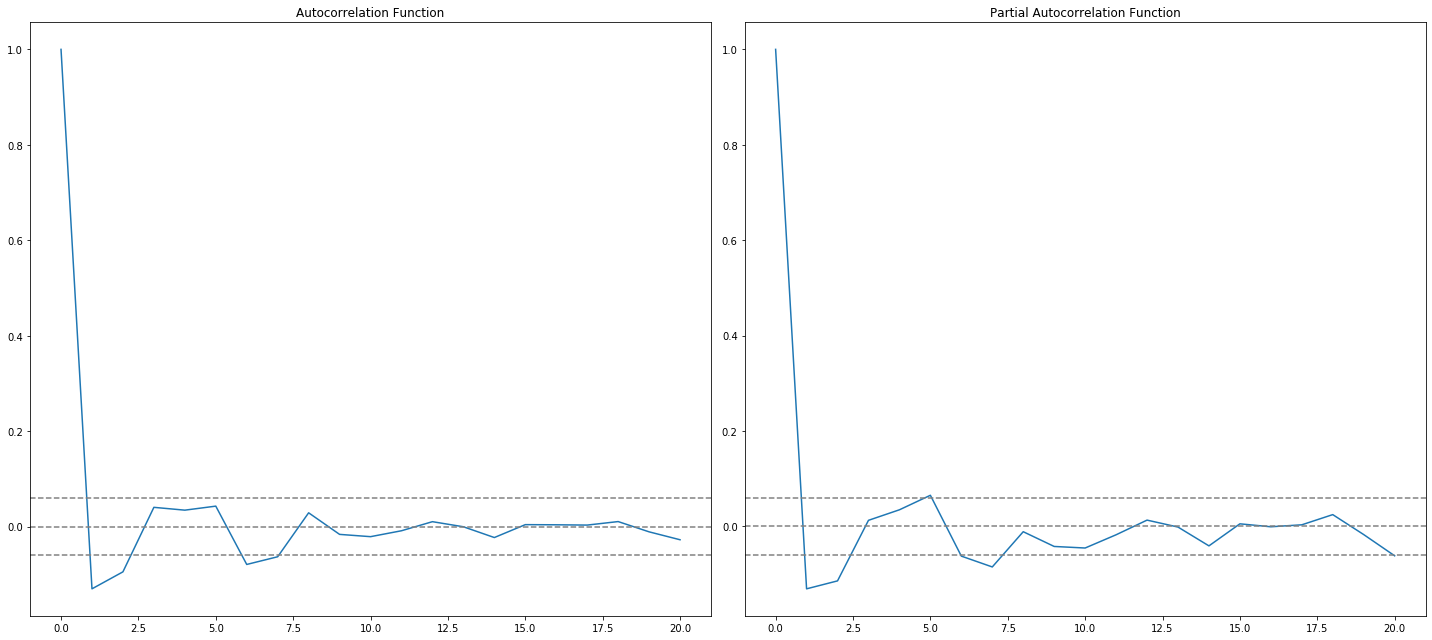

In [308]:
#ACF and PACF Plots

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import acf, pacf

lag_acf= acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method ='ols')

# Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()

Plotting ARIMA Model


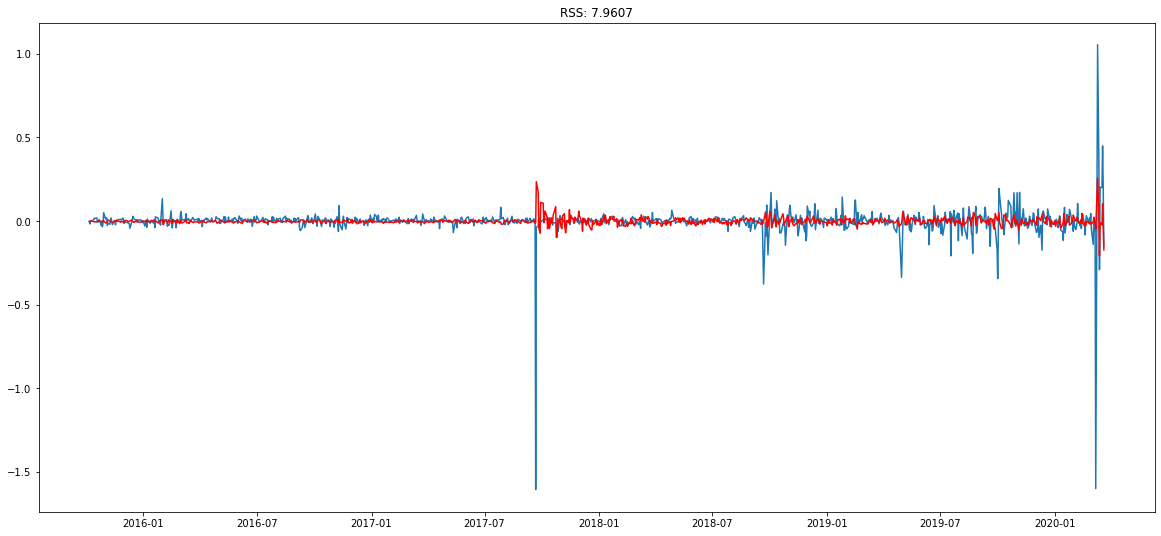

In [309]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')

#AR Model
model= ARIMA(indexedDataset_logScale, order=(18,1,16))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - datasetLogDiffShifting['Low'])**2))
print('Plotting ARIMA Model')

In [310]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2015-10-07   -0.002538
2015-10-08   -0.002283
2015-10-09   -0.000031
2015-10-12   -0.001079
2015-10-13   -0.003631
dtype: float64


In [311]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2015-10-07   -0.002538
2015-10-08   -0.004821
2015-10-09   -0.004852
2015-10-12   -0.005931
2015-10-13   -0.009562
dtype: float64


In [313]:
import warnings
warnings.filterwarnings('ignore')

predictions_ARIMA_log =pd.Series(indexedDataset_logScale['Low'].ix[0],index=indexedDataset_logScale.index)
predictions_ARIMA_log=predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2015-10-06    6.602452
2015-10-07    6.599914
2015-10-08    6.597631
2015-10-09    6.597600
2015-10-12    6.596522
dtype: float64

In [314]:
indexedDataset_logScale

,Low
Date,
2015-10-06,6.602452
2015-10-07,6.597964
2015-10-08,6.579876
2015-10-09,6.579390
2015-10-12,6.580084
...,...
2020-03-13,3.061052
2020-03-16,3.260018
2020-03-17,3.708682


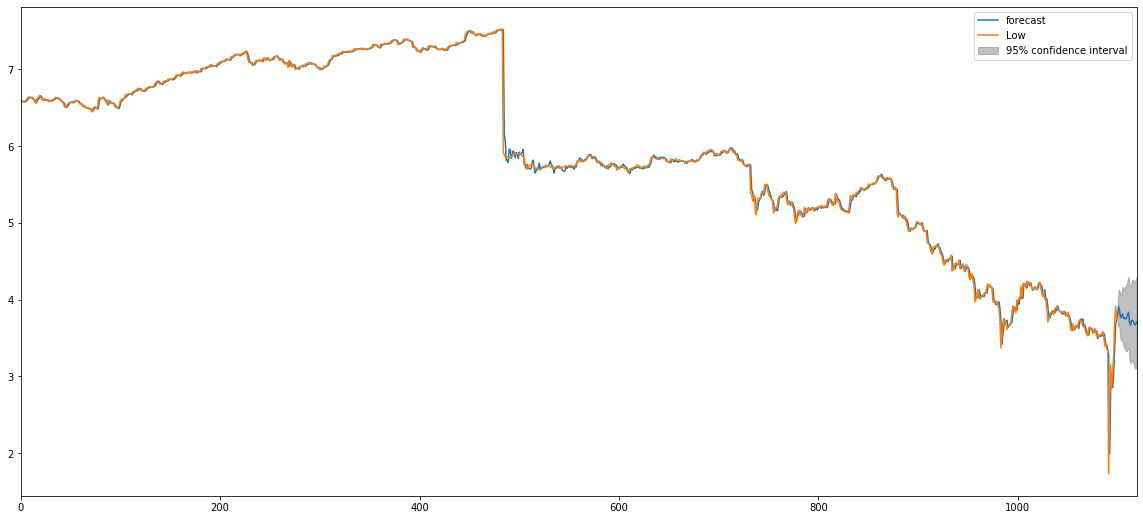

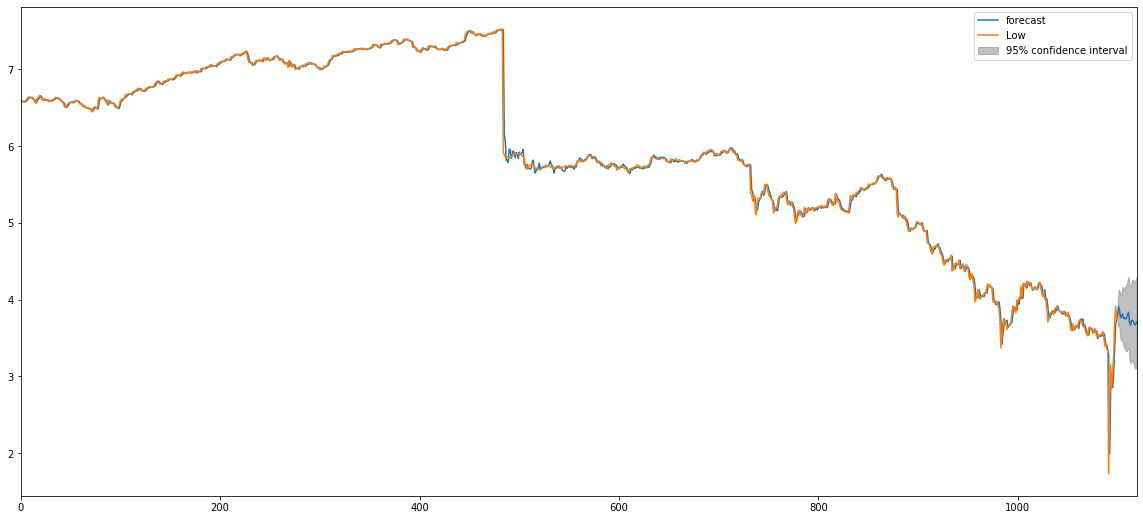

In [315]:
results_AR.plot_predict(1,1120)

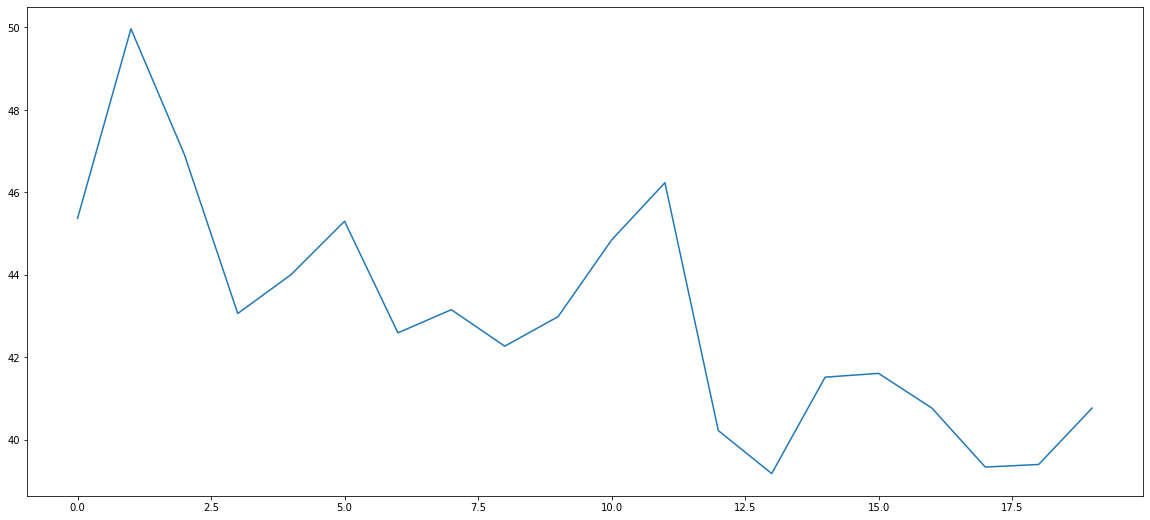

In [316]:
x=results_AR.forecast(steps=20)

plt.plot(np.exp(x[0]))

In [317]:
print(np.exp(x[0]))

[45.36912415 49.96716876 46.92023217 43.06041736 44.0045419  45.29851534
 42.59034035 43.15266585 42.26753667 42.98472686 44.84125126 46.23349799
 40.2200997  39.17708293 41.51575465 41.60779716 40.76599482 39.33417475
 39.39799959 40.76620782]


In [213]:
import tensorflow